In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory
from matplotlib import cm
from matplotlib.colors import Normalize

/tmp/ipykernel_1008509/561995347.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


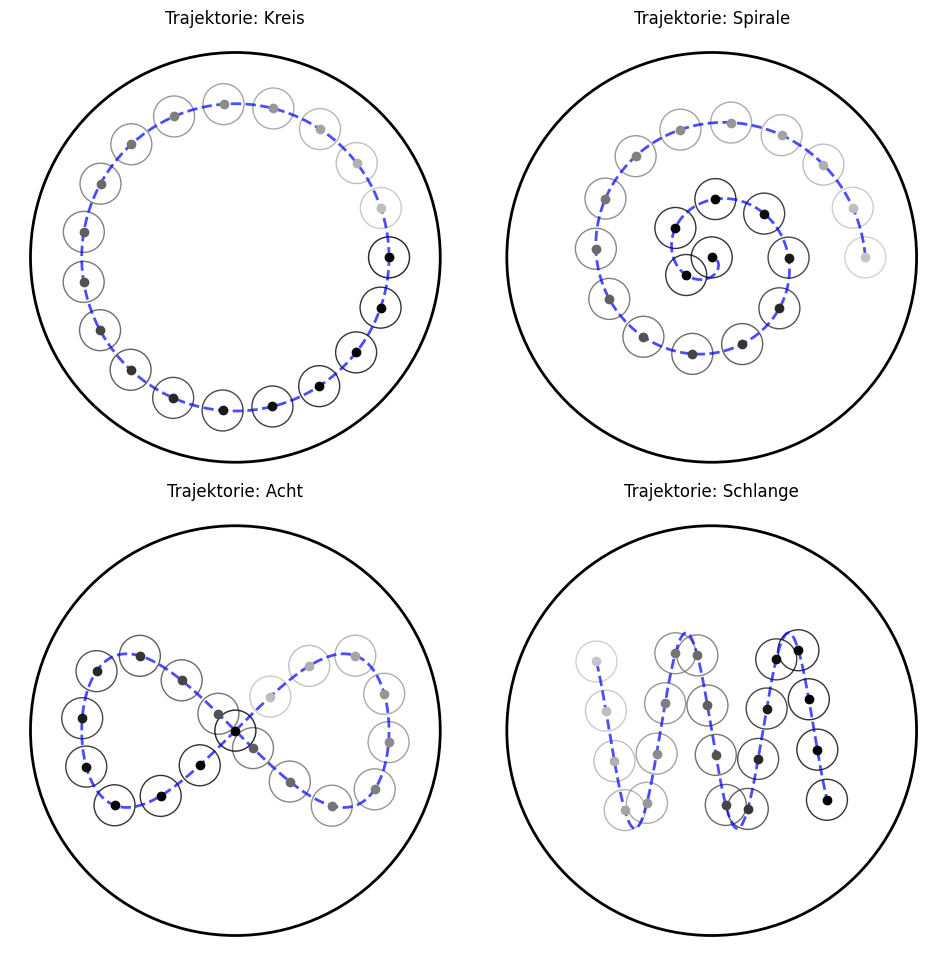

In [6]:
def create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius):
    """
    Create a figure showing trajectories with example points and circles
    
    Parameters:
    trajectories (list): List of trajectory types to plot
    Nsteps (int): Number of points per trajectory
    radius (float): Radius of the circles around points
    path_radius (float): Radius of the trajectory path
    """
    # Create 2x2 subplot layout with uniform spacing
    fig = plt.figure(figsize=(12, 12))  # Make figure square
    gs = plt.GridSpec(2, 2, figure=fig, wspace=0.05, hspace=0.05)  # Uniform small spacing
    axes = [fig.add_subplot(gs[i]) for i in range(4)]
    
    # Find global plot limits
    all_coords = []
    for traj in trajectories:
        points = create_trajectory(traj, path_radius, Nsteps)
        all_coords.append(points)
    
    all_points = np.vstack(all_coords)
    margin = 0.1
    global_min_x = min(np.min(all_points[:, 0]) - margin, -1.1)
    global_max_x = max(np.max(all_points[:, 0]) + margin, 1.1)
    global_min_y = min(np.min(all_points[:, 1]) - margin, -1.1)
    global_max_y = max(np.max(all_points[:, 1]) + margin, 1.1)
    
    # Plot each trajectory
    for i, traj in enumerate(trajectories):
        points = create_trajectory(traj, path_radius, Nsteps)
        ax = axes[i]
        
        # Plot trajectory path
        ax.plot(points[:, 0], points[:, 1], '--', color='blue', alpha=0.7, linewidth=2)
        
        # Plot example points with circles
        num_example_points = 20
        indices = np.linspace(0, len(points) - 1, num_example_points, dtype=int)
        
        # Create color gradient
        cmap = cm.Greys
        norm = Normalize(vmin=0.0, vmax=0.9)
        colors = cmap(norm(np.linspace(0.3, 1.0, num_example_points)))
        
        # Plot points and circles
        for j, idx in enumerate(indices):
            ax.plot(points[idx, 0], points[idx, 1], 'o', color=colors[j], markersize=6)
            circle = Circle((points[idx, 0], points[idx, 1]), radius=radius, 
                          fill=False, color=colors[j], alpha=0.8)
            ax.add_patch(circle)
        
        # Add unit circle
        unit_circle = Circle((0, 0), radius=1, fill=False, color='black', 
                           linewidth=2, linestyle='-')
        ax.add_patch(unit_circle)
        
        # Remove frames
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        # Set axis properties
        ax.set_aspect('equal')
        ax.set_title(f'Trajektorie: {traj}')
        
        # Remove tick labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Set axis limits
        ax.set_xlim(global_min_x, global_max_x)
        ax.set_ylim(global_min_y, global_max_y)
        

    
    plt.tight_layout()
    return fig

# Example usage:
import os

# Create 'Abbildung' directory if it doesn't exist
if not os.path.exists('Abbildungen'):
    os.makedirs('Abbildungen')

trajectories = ["Kreis", "Spirale", "Acht", "Schlange"]
Nsteps = 1000
radius = 0.1
path_radius = 0.75
fig = create_figure_with_trajectories(trajectories, Nsteps, radius, path_radius)

# Save in 'Abbildungen' directory
save_path = os.path.join('Abbildungen', 'trajectory_visualization.pdf')
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
plt.show()